# HEART ATTACK ANALYSIS AND PREDICTION💔

* [IMPORT FILES](#section-two)
* [GET THE DATA](#section-three)
* [EDA](#section-four)
* [DATA VISUALIZATION](#section-five)
* [DATA PREPROCESSING](#section-six)
* [MODELS](#section-seven)


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


> Data Dictionary

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholesterol in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable


<a id="section-two"></a>
# IMPORT FILES
Importing all my required libraries for this notebook.

In [54]:
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<a id="section-three"></a>
# GET THE DATA
Fetching data from CSV file.

In [4]:
df = pd.read_csv("heart.csv")

<a id="section-four"></a>
# Get to know the data
The main purpose of EDA is to help look at data before making any assumptions.

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
df["age"].mean()

54.366336633663366

In [9]:
#missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="section-five"></a>
# See the data (be the data)


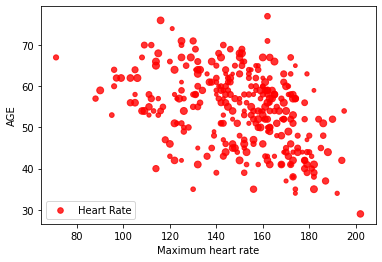

In [17]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = df['thalachh']
y = df['age']
s = np.random.rand(*x.shape) * 150 + 50

plt.scatter(x, y, s, c="r", alpha=0.8, marker=r'.',
            label="Heart Rate")
plt.xlabel("Maximum heart rate")
plt.ylabel("AGE")
plt.legend(loc='lower left')
plt.show()

<Figure size 1440x1080 with 0 Axes>

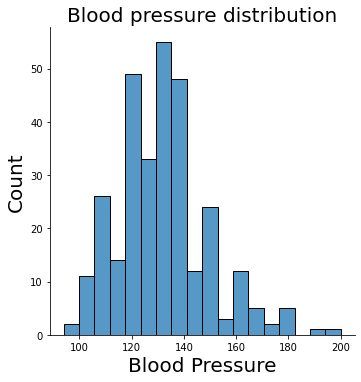

In [18]:
plt.figure(figsize=(20,15))
sns.displot(df["trtbps"])
plt.title("Blood pressure distribution", fontsize=20)
plt.xlabel("Blood Pressure", fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

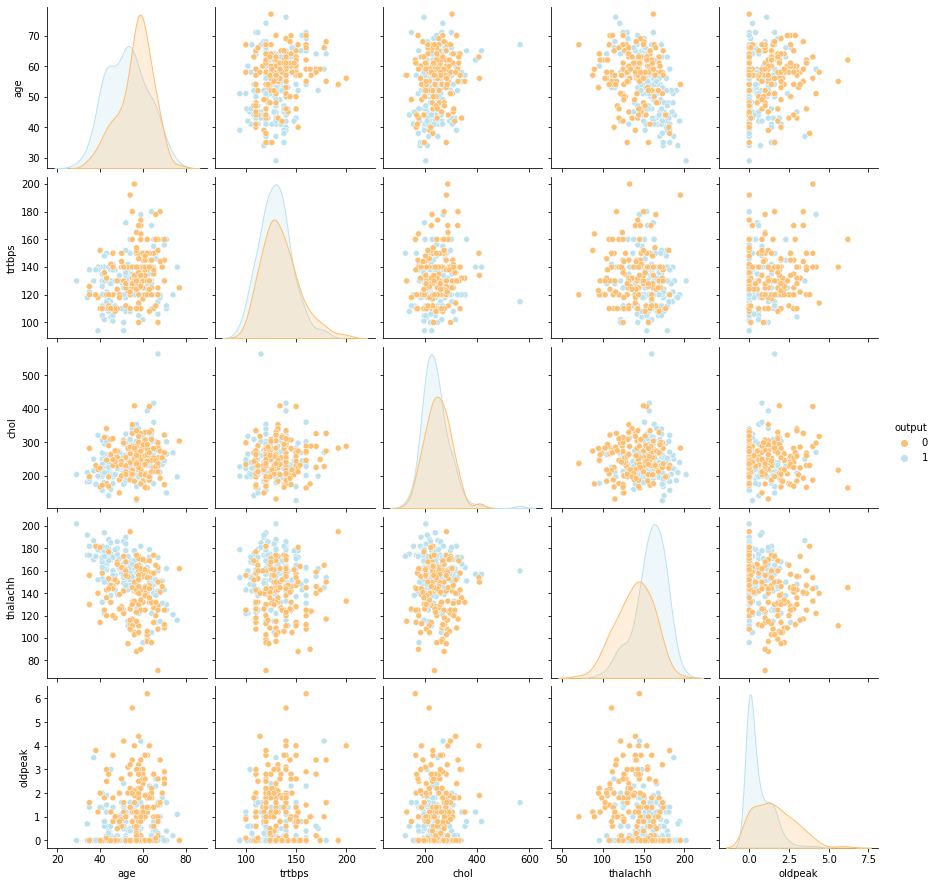

In [73]:
x_vars=['age','trtbps','chol','thalachh','oldpeak']
y_vars=['age','trtbps','chol','thalachh','oldpeak']

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue='output',palette='RdYlBu')

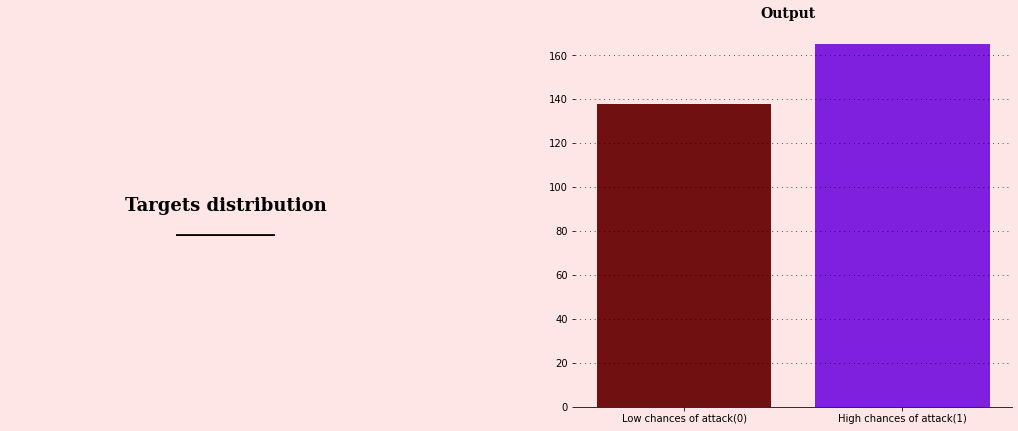

In [71]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Targets distribution\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)


4.1 Conclusions from the data analysis

    There are no NaN values in the data.
    There are certain outliers in all the continuous features.
    The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp.
    It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
    According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.
    According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.

<a id="section-six"></a>
# Convert to numpy


In [69]:
x=df.iloc[:, 1:-1].values 
y=df.iloc[:, -1].values
x.shape

(303, 12)

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)


**FEATURE SCALING**

In [22]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

<a id="section-seven"></a>
# MODELS
Use SVMs, LightGBM and Random Forests.

**SUPPORT VECTOR MACHINE**

In [56]:
model= SVC()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print("Confusion Matrix:", conf)
print("The Accuracy of SVM is: ", accuracy_score(y_test, predicted)*100)

Confusion Matrix: [[21  6]
 [ 2 32]]
The Accuracy of SVM is:  86.88524590163934


**GRADIENT BOOSTED TREES**

In [79]:
model = LGBMClassifier(num_leaves=10)
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print("Confusion Matrix:", conf)
print("The Accuracy of LGBM is: ", accuracy_score(y_test, predicted)*100)

Confusion Matrix: [[23  4]
 [ 5 29]]
The Accuracy of LGBM is:  85.24590163934425


**RANDOM FOREST**

In [67]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print("Confusion Matrix:", conf)
print("The Accuracy of Random Forest is: ", accuracy_score(y_test, predicted)*100)

Confusion Matrix: [[23  4]
 [ 3 31]]
The Accuracy of Random Forest is:  88.52459016393442
